# EEG Brain Signal Analysis and Classification

In [3]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijayveersingh/1-2m-brain-signal-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '1-2m-brain-signal-data' dataset.
Path to dataset files: /kaggle/input/1-2m-brain-signal-data


In [4]:
import os

dataset_path = path

# List the contents of the downloaded dataset directory
print("Contents of the dataset directory:")
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    for name in files:
        print(f"  File: {name}")

Contents of the dataset directory:
Directory: /kaggle/input/1-2m-brain-signal-data
Directory: /kaggle/input/1-2m-brain-signal-data/MindBigData-IN-v1.06
  File: IN.txt
Directory: /kaggle/input/1-2m-brain-signal-data/MindBigData-EP-v1.0
  File: EP1.01.txt
Directory: /kaggle/input/1-2m-brain-signal-data/MindBigData-MU-v1.0
  File: MU.txt
Directory: /kaggle/input/1-2m-brain-signal-data/MindBigData-MW-v1.0
  File: MW.txt


### Download Dataset

In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijayveersingh/1-2m-brain-signal-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '1-2m-brain-signal-data' dataset.
Path to dataset files: /kaggle/input/1-2m-brain-signal-data


### List Dataset Contents

In [31]:
import os

dataset_path = path

# List the contents of the downloaded dataset directory
print("Contents of the dataset directory:")
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    for name in files:
        print(f"  File: {name}")

Contents of the dataset directory:
Directory: /kaggle/input/1-2m-brain-signal-data
Directory: /kaggle/input/1-2m-brain-signal-data/MindBigData-IN-v1.06
  File: IN.txt
Directory: /kaggle/input/1-2m-brain-signal-data/MindBigData-EP-v1.0
  File: EP1.01.txt
Directory: /kaggle/input/1-2m-brain-signal-data/MindBigData-MU-v1.0
  File: MU.txt
Directory: /kaggle/input/1-2m-brain-signal-data/MindBigData-MW-v1.0
  File: MW.txt


### Load Data into DataFrame

In [32]:
import pandas as pd
import os

file_path_in = os.path.join(dataset_path, 'MindBigData-IN-v1.06', 'IN.txt')
# Read the file again, specifying no header and providing column names
column_names = ["id", "event", "device", "channel", "code", "size", "data"]
df = pd.read_csv(file_path_in, delimiter='\t', header=None, names=column_names)

### Display DataFrame Head

In [33]:
df.head()

,id,event,device,channel,code,size,data
0,1142043,173652,IN,AF3,0,256,"4259.487179,4237.948717,4247.179487,4242.05128..."
1,1142044,173652,IN,AF4,0,256,"4103.076923,4100.512820,4102.564102,4087.69230..."
2,1142045,173652,IN,T7,0,256,"4245.128205,4218.461538,4242.051282,4245.12820..."
3,1142046,173652,IN,T8,0,256,"4208.717948,4188.717948,4204.102564,4198.46153..."
4,1142047,173652,IN,PZ,0,256,"4189.230769,4203.589743,4188.717948,4186.66666..."


### Plot Raw EEG Signals for Random Event

Analyzing random event: 185838


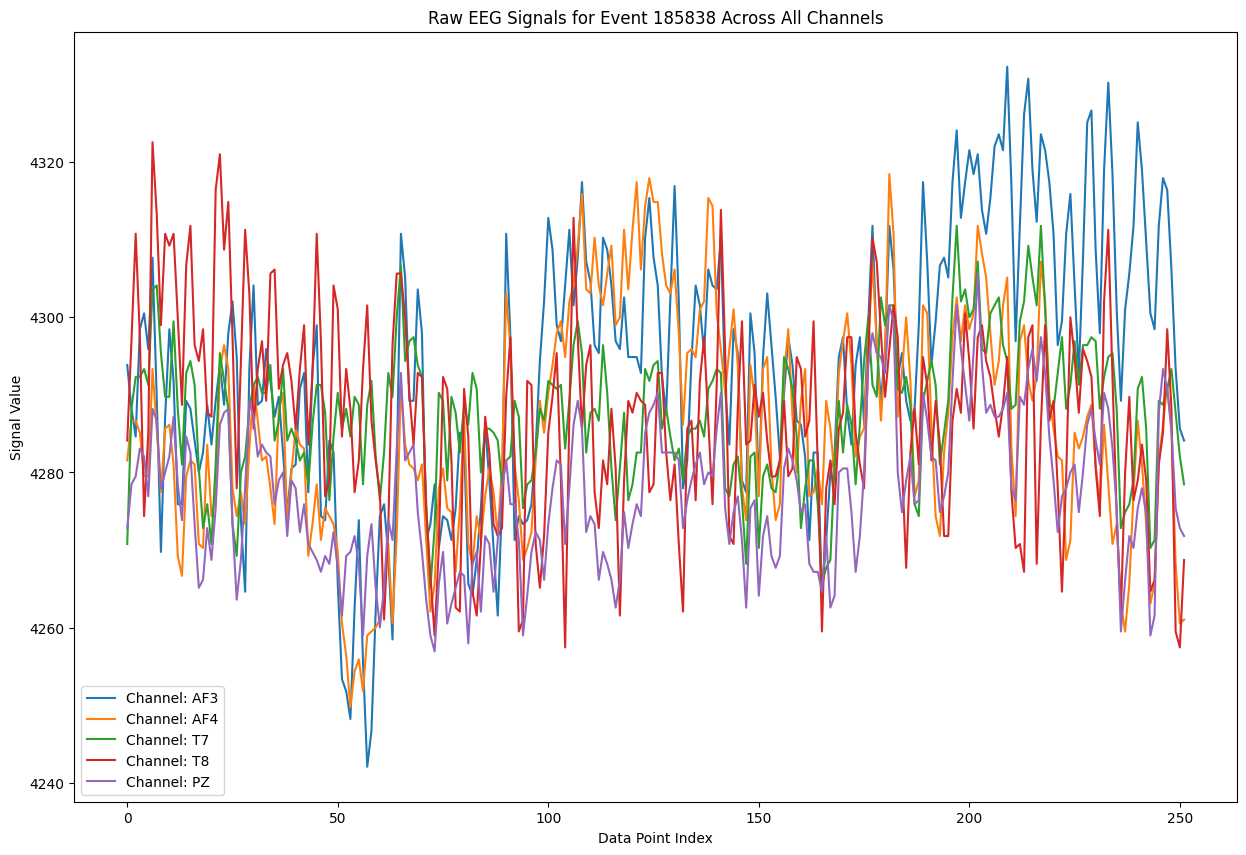

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Get a list of unique events
events = df['event'].unique()

# Select a random event
random_event = np.random.choice(events)
print(f"Analyzing random event: {random_event}")

# Filter the dataframe for the selected random event
event_df = df[df['event'] == random_event].copy()

# Process the 'data' column: convert string of comma-separated values to a list of floats
event_df['data'] = event_df['data'].apply(lambda x: [float(i) for i in x.split(',')])

# Plot the raw EEG signals for all channels for the random event
plt.figure(figsize=(15, 10))

for index, row in event_df.iterrows():
    channel = row['channel']
    signal_data = row['data']
    plt.plot(signal_data, label=f'Channel: {channel}')

plt.title(f'Raw EEG Signals for Event {random_event} Across All Channels')
plt.xlabel('Data Point Index')
plt.ylabel('Signal Value')
plt.legend()
plt.show()

### Plot EEG Signals for a Specific Digit

Analyzing digit: 1
Analyzing a random event (178704) for digit 1


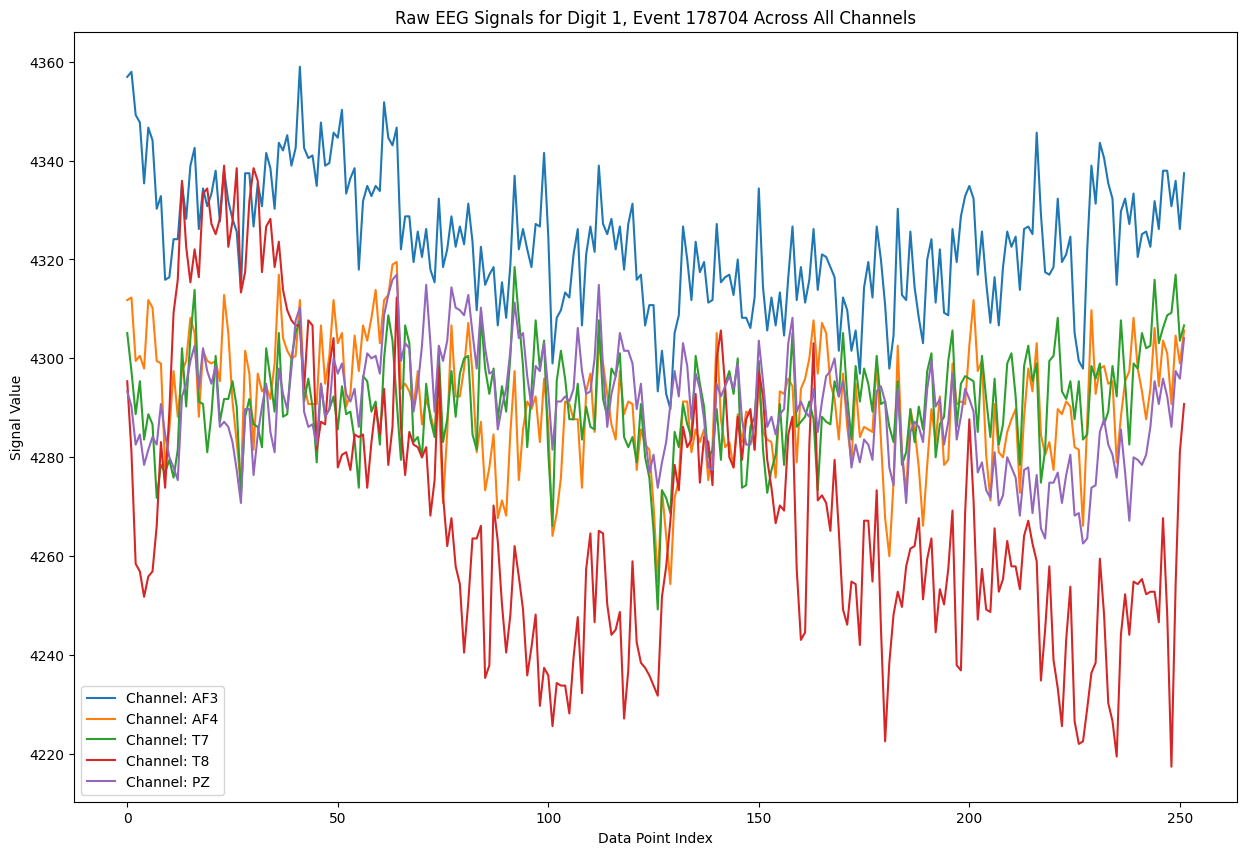

In [35]:
# Function to plot EEG signals for a given digit
def plot_eeg_for_digit(dataframe, digit):
    """
    Filters the dataframe for a specific digit and plots the raw EEG signals.

    Args:
        dataframe (pd.DataFrame): The input dataframe containing EEG data.
        digit (int): The digit to filter and plot.
    """
    print(f"Analyzing digit: {digit}")

    # Filter the dataframe for the selected digit
    # Assuming the 'code' column represents the digit
    digit_df = dataframe[dataframe['code'] == digit].copy()

    if digit_df.empty:
        print(f"No data found for digit {digit}")
        return

    # Get a list of unique events for this digit
    events_for_digit = digit_df['event'].unique()

    if len(events_for_digit) == 0:
        print(f"No events found for digit {digit}")
        return

    # Select a random event for the digit
    random_event_for_digit = np.random.choice(events_for_digit)
    print(f"Analyzing a random event ({random_event_for_digit}) for digit {digit}")

    # Filter for the selected random event for the digit
    event_digit_df = digit_df[digit_df['event'] == random_event_for_digit].copy()


    # Process the 'data' column: convert string of comma-separated values to a list of floats
    event_digit_df['data'] = event_digit_df['data'].apply(lambda x: [float(i) for i in x.split(',')])

    # Plot the raw EEG signals for all channels for the selected event and digit
    plt.figure(figsize=(15, 10))

    for index, row in event_digit_df.iterrows():
        channel = row['channel']
        signal_data = row['data']
        plt.plot(signal_data, label=f'Channel: {channel}')

    plt.title(f'Raw EEG Signals for Digit {digit}, Event {random_event_for_digit} Across All Channels')
    plt.xlabel('Data Point Index')
    plt.ylabel('Signal Value')
    plt.legend()
    plt.show()

# Example usage: Plot EEG for digit 1
# Replace '1' with the digit you want to analyze
plot_eeg_for_digit(df, 1)

### Plot Average EEG Waveform for Digit 1

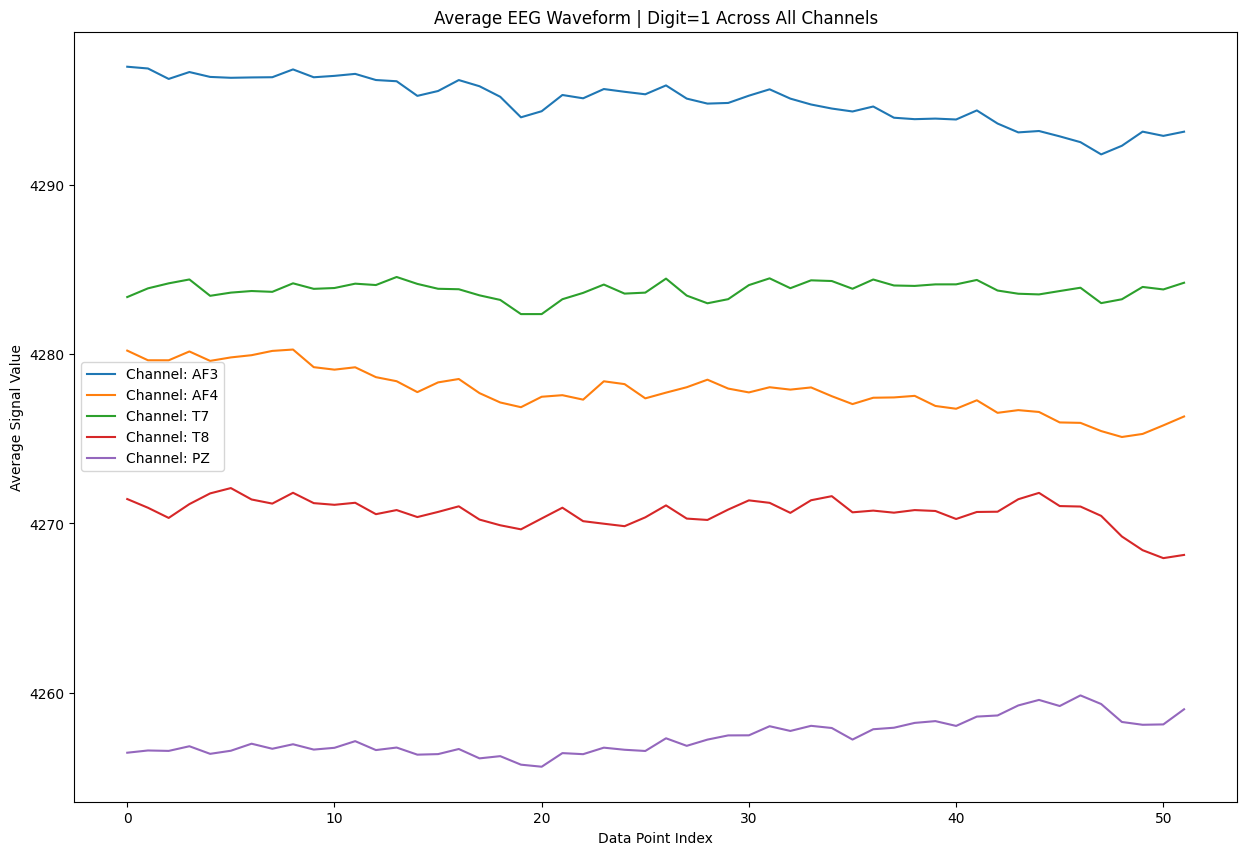

In [36]:
# Filter the dataframe for digit 1
digit_1_df = df[df['code'] == 1].copy()

if digit_1_df.empty:
    print("No data found for digit 1")
else:
    # Process the 'data' column and group by channel
    digit_1_df['data'] = digit_1_df['data'].apply(lambda x: [float(i) for i in x.split(',')])

    # Aggregate data for each channel
    channel_data = {}
    for index, row in digit_1_df.iterrows():
        channel = row['channel']
        signal_data = row['data']
        if channel not in channel_data:
            channel_data[channel] = []
        channel_data[channel].append(signal_data)

    # Calculate the average waveform for each channel
    average_waveforms = {}
    for channel, signals in channel_data.items():
        # Ensure all signals for a channel have the same length
        min_length = min(len(s) for s in signals)
        truncated_signals = [s[:min_length] for s in signals]
        average_waveforms[channel] = np.mean(truncated_signals, axis=0)

    # Plot the average EEG waveforms for all channels for Digit 1
    plt.figure(figsize=(15, 10))

    for channel, avg_signal in average_waveforms.items():
        plt.plot(avg_signal, label=f'Channel: {channel}')

    plt.title('Average EEG Waveform | Digit=1 Across All Channels')
    plt.xlabel('Data Point Index')
    plt.ylabel('Average Signal Value')
    plt.legend()
    plt.show()

### Plot Average EEG Waveform for Digit 3

Analyzing digit: 3
Most common signal length for digit 3: 252


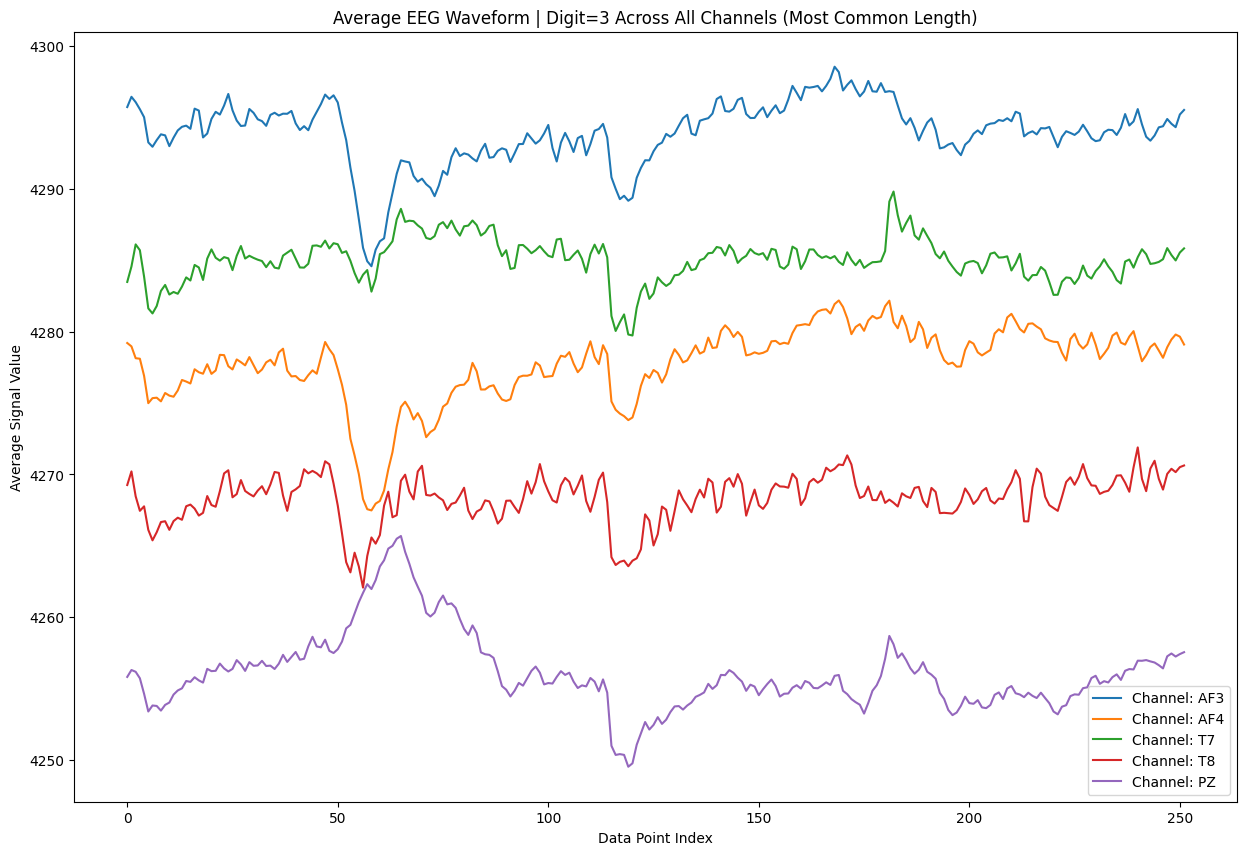

In [37]:
from collections import Counter

# Define the digit to analyze
digit_to_analyze = 3

print(f"Analyzing digit: {digit_to_analyze}")

# Filter the dataframe for the specified digit
digit_df = df[df['code'] == digit_to_analyze].copy()

if digit_df.empty:
    print(f"No data found for digit {digit_to_analyze}")
else:
    # Process the 'data' column: convert string of comma-separated values to a list of floats
    digit_df['data'] = digit_df['data'].apply(lambda x: [float(i) for i in x.split(',')])

    # Check signal lengths and find the most common length
    signal_lengths = [len(signal) for signal in digit_df['data']]
    length_counts = Counter(signal_lengths)
    most_common_length = length_counts.most_common(1)[0][0]
    print(f"Most common signal length for digit {digit_to_analyze}: {most_common_length}")

    # Filter for signals with the most common length
    valid_signals_df = digit_df[digit_df['data'].apply(len) == most_common_length].copy()

    if valid_signals_df.empty:
        print(f"No valid signals of length {most_common_length} found for digit {digit_to_analyze}")
    else:
        # Aggregate valid signals for each channel
        channel_data = {}
        for index, row in valid_signals_df.iterrows():
            channel = row['channel']
            signal_data = row['data']
            if channel not in channel_data:
                channel_data[channel] = []
            channel_data[channel].append(signal_data)

        # Calculate the average waveform for each channel
        average_waveforms = {}
        for channel, signals in channel_data.items():
            average_waveforms[channel] = np.mean(signals, axis=0)

        # Plot the average EEG waveforms for all channels for the specified digit
        plt.figure(figsize=(15, 10))

        for channel, avg_signal in average_waveforms.items():
            plt.plot(avg_signal, label=f'Channel: {channel}')

        plt.title(f'Average EEG Waveform | Digit={digit_to_analyze} Across All Channels (Most Common Length)')
        plt.xlabel('Data Point Index')
        plt.ylabel('Average Signal Value')
        plt.legend()
        plt.show()

### Calculate and Plot Power Spectral Density

Using average waveform of channel AF3 for digit 3 for PSD calculation.


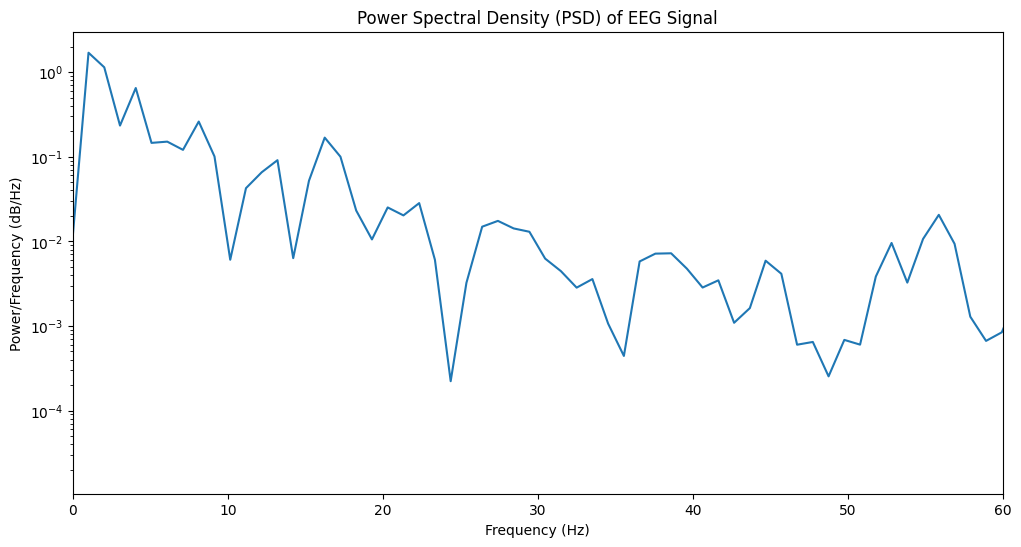

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

if 'average_waveforms' in locals() and 'AF3' in average_waveforms:
    sample_signal = average_waveforms['AF3']
    print("Using average waveform of channel AF3 for digit 3 for PSD calculation.")
elif not df.empty:
    # If average_waveforms are not available, take the first signal from the dataframe
    # (assuming 'data' column is already processed into list of floats)
    # You might need to re-run the data processing step if you run this cell independently
    if isinstance(df['data'].iloc[0], list):
        sample_signal = df['data'].iloc[0]
        print("Using the first signal from the dataframe for PSD calculation.")
    else:
        print("Data column not processed. Please run the data processing steps first.")
        sample_signal = None
else:
    print("No data available in 'df' or 'average_waveforms' for PSD calculation.")
    sample_signal = None


if sample_signal is not None:
    # Define sampling frequency (assuming a common EEG sampling rate, e.g., 256 Hz)
    # You should replace this with the actual sampling rate if known
    sf = 256

    # Calculate Power Spectral Density using Welch's method
    # nperseg: Length of each segment
    # fs: Sampling frequency
    f, psd = welch(sample_signal, fs=sf, nperseg=min(len(sample_signal), 256))

    # Plot the PSD
    plt.figure(figsize=(12, 6))
    plt.semilogy(f, psd) # Use semi-log scale for better visualization of power
    plt.title('Power Spectral Density (PSD) of EEG Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.xlim([0, 60]) # Limit frequency axis to 0-60 Hz
    plt.show()
else:
    print("Could not perform PSD calculation as no valid sample signal was found.")

### Calculate and Visualize Average Band Powers

Analyzing digit: 6
Most common signal length for digit 6: 252

Average Band Powers per Channel for Digit 6
Channel AF3:
  Delta: 774.99
  Theta: 77.25
  Alpha: 29.99
  Beta: 44.18
  Gamma: 36.87
Channel AF4:
  Delta: 243.70
  Theta: 58.24
  Alpha: 31.05
  Beta: 47.06
  Gamma: 44.58
Channel T7:
  Delta: 209.37
  Theta: 57.82
  Alpha: 24.40
  Beta: 36.72
  Gamma: 54.54
Channel T8:
  Delta: 153.07
  Theta: 46.14
  Alpha: 24.17
  Beta: 50.37
  Gamma: 124.30
Channel PZ:
  Delta: 135.87
  Theta: 49.94
  Alpha: 24.78
  Beta: 37.47
  Gamma: 25.53


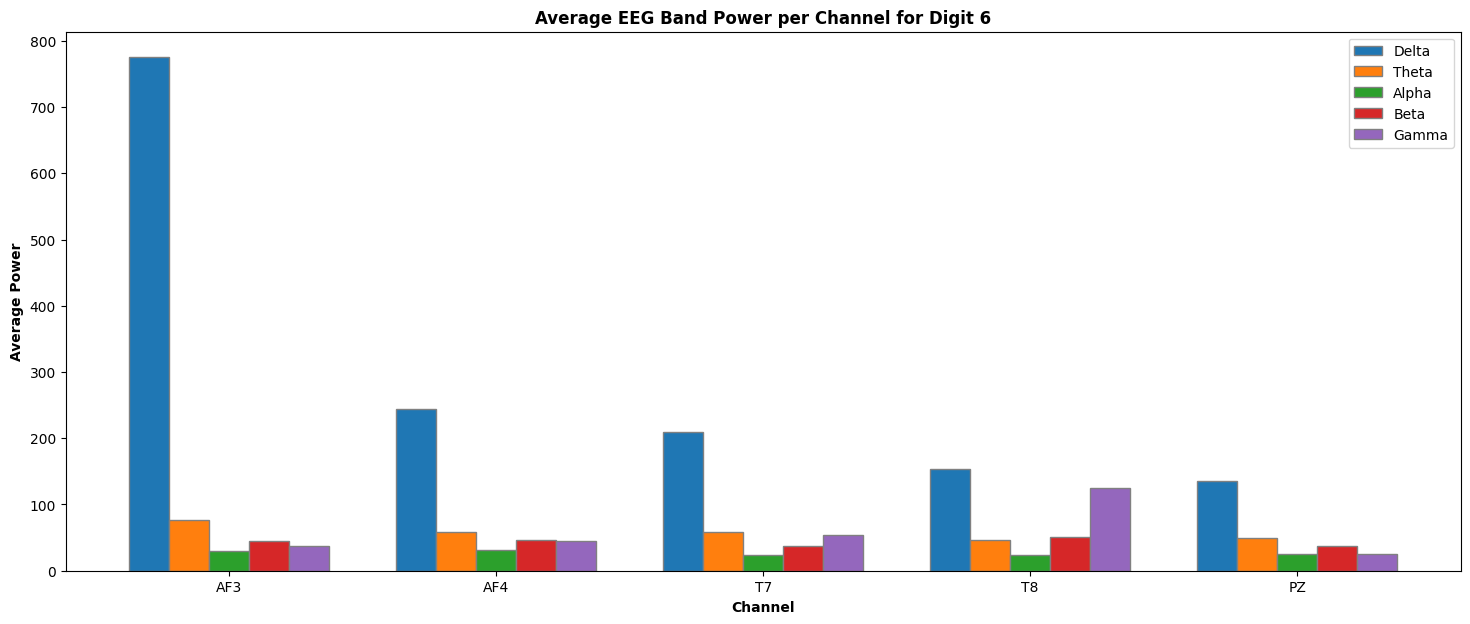

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch
from collections import Counter

# Define the digit to analyze and frequency bands
digit_to_analyze = 6
sampling_frequency = 256  # Assuming a sampling frequency of 256 Hz

# Define EEG frequency bands
eeg_bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 60)
}

print(f"Analyzing digit: {digit_to_analyze}")

# Filter the dataframe for the specified digit
digit_df = df[df['code'] == digit_to_analyze].copy()

if digit_df.empty:
    print(f"No data found for digit {digit_to_analyze}")
else:
    # Process the 'data' column: convert string of comma-separated values to a list of floats
    # digit_df['data'] = digit_df['data'].apply(lambda x: [float(i) for i in x.split(',')]) # This line is removed as data is already processed

    # Check signal lengths and find the most common length
    signal_lengths = [len(signal) for signal in digit_df['data']]
    length_counts = Counter(signal_lengths)
    if not length_counts:
        print(f"No signal lengths found for digit {digit_to_analyze}")
        valid_signals_df = pd.DataFrame() # Create empty dataframe
    else:
        most_common_length = length_counts.most_common(1)[0][0]
        print(f"Most common signal length for digit {digit_to_analyze}: {most_common_length}")
        # Filter for signals with the most common length
        valid_signals_df = digit_df[digit_df['data'].apply(len) == most_common_length].copy()


    if valid_signals_df.empty:
        print(f"No valid signals of length {most_common_length} found for digit {digit_to_analyze}")
    else:
        # Calculate PSD for each valid signal and store band powers
        channel_band_powers = {}

        for index, row in valid_signals_df.iterrows():
            channel = row['channel']
            signal_data = np.array(row['data']) # Convert to numpy array for welch

            # Calculate Power Spectral Density using Welch's method
            # nperseg: Length of each segment. Use min(signal_data.shape[-1], 256) to avoid error
            nperseg_val = min(signal_data.shape[-1], 256)
            if nperseg_val == 0:
                print(f"Skipping calculation for channel {channel} due to zero length signal.")
                continue

            try:
                f, psd = welch(signal_data, fs=sampling_frequency, nperseg=nperseg_val)

                # Calculate band power for each band
                band_powers = {}
                for band, (low_f, high_f) in eeg_bands.items():
                    # Find indices of frequencies within the band
                    band_indices = np.where((f >= low_f) & (f <= high_f))[0]
                    if len(band_indices) > 0:
                        # Integrate power within the band (sum of psd * frequency resolution)
                        # Assuming uniform frequency resolution from welch
                        freq_resolution = f[1] - f[0] if len(f) > 1 else 1
                        band_power = np.sum(psd[band_indices]) * freq_resolution
                        band_powers[band] = band_power
                    else:
                        band_powers[band] = 0 # No frequencies in this band found

                if channel not in channel_band_powers:
                    channel_band_powers[channel] = []
                channel_band_powers[channel].append(band_powers)

            except Exception as e:
                print(f"Error calculating PSD for channel {channel}, event {row['event']}: {e}")
                continue


        # Calculate average band power for each channel
        average_band_powers = {}
        for channel, list_of_band_powers in channel_band_powers.items():
            if list_of_band_powers:
                # Convert list of dictionaries to a dictionary of lists for easier averaging
                band_power_dict_of_lists = {band: [bp[band] for bp in list_of_band_powers if band in bp] for band in eeg_bands.keys()}

                average_band_powers[channel] = {
                    band: np.mean(band_power_dict_of_lists[band]) if band_power_dict_of_lists[band] else 0
                    for band in eeg_bands.keys()
                }
            else:
                 average_band_powers[channel] = {band: 0 for band in eeg_bands.keys()} # No data for this channel

        # Display or plot the average band powers
        print("\nAverage Band Powers per Channel for Digit", digit_to_analyze)
        for channel, avg_powers in average_band_powers.items():
            print(f"Channel {channel}:")
            for band, power in avg_powers.items():
                print(f"  {band}: {power:.2f}")


        if average_band_powers:
            channels = list(average_band_powers.keys())
            bands = list(eeg_bands.keys())
            num_channels = len(channels)
            num_bands = len(bands)

            if num_channels > 0 and num_bands > 0:
                bar_width = 0.15
                r = np.arange(num_channels)

                plt.figure(figsize=(18, 7))

                for i, band in enumerate(bands):
                    values = [average_band_powers[channel][band] for channel in channels]
                    plt.bar(r + i * bar_width, values, color=f'C{i}', width=bar_width, edgecolor='grey', label=band)

                plt.xlabel('Channel', fontweight='bold')
                plt.ylabel('Average Power', fontweight='bold')
                plt.title(f'Average EEG Band Power per Channel for Digit {digit_to_analyze}', fontweight='bold')
                plt.xticks(r + bar_width * (num_bands - 1) / 2, channels)
                plt.legend()
                plt.show()
            else:
                print("Not enough data to create a bar chart.")

### Calculate and Plot Spectrogram

Using average waveform of channel AF3 for digit 6 for spectrogram calculation.


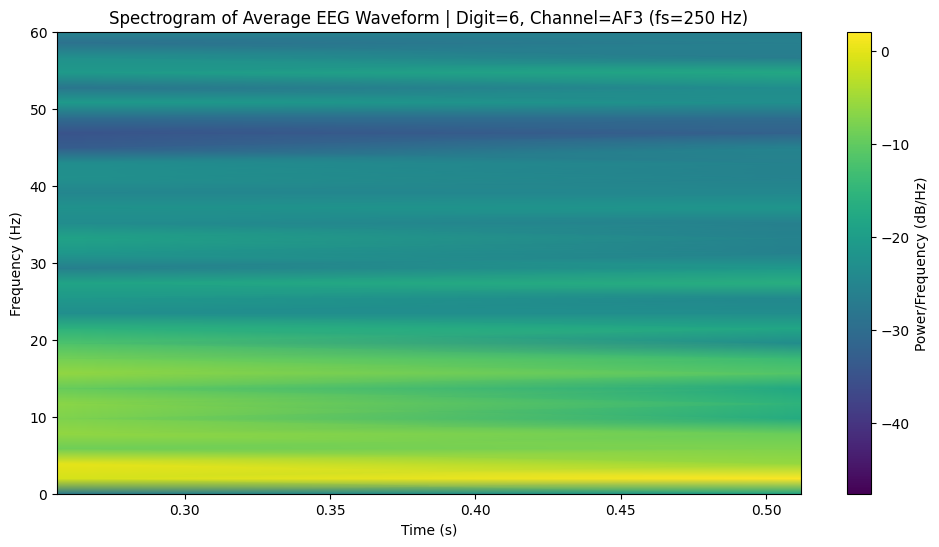

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram # Import spectrogram

# Assuming average_waveforms for digit 6 are available from the previous cell
# Make sure to run the previous cell (6xeRVFuWT8oZ) to have average_waveforms available

digit_to_analyze = 6
sampling_frequency = 250  # User specified sampling frequency as 250 Hz

if 'average_waveforms' in locals() and 'AF3' in average_waveforms:
    sample_signal = average_waveforms['AF3']
    print(f"Using average waveform of channel AF3 for digit {digit_to_analyze} for spectrogram calculation.")

    # Calculate the spectrogram
    # nperseg: Length of each segment
    # noverlap: Number of points to overlap between segments
    # fs: Sampling frequency
    # You might need to adjust nperseg and noverlap based on your data characteristics and desired time/frequency resolution
    nperseg_val = 128 # Use a fixed segment length (power of 2 is often good)
    noverlap_val = nperseg_val // 2 # Common to use 50% overlap

    if nperseg_val == 0:
        print("Cannot compute spectrogram for an empty signal.")
    else:
        f, t, Sxx = spectrogram(sample_signal, fs=sampling_frequency, nperseg=nperseg_val, noverlap=noverlap_val)

        # Plot the spectrogram
        plt.figure(figsize=(12, 6))
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud') # Use log scale for power
        plt.title(f'Spectrogram of Average EEG Waveform | Digit={digit_to_analyze}, Channel=AF3 (fs={sampling_frequency} Hz)')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.ylim([0, 60]) # Limit frequency axis to 0-60 Hz
        plt.colorbar(label='Power/Frequency (dB/Hz)')
        plt.show()

elif not df.empty:
    print(f"Average waveforms for digit {digit_to_analyze} not found. Please run the previous cell.")
    print("Alternatively, you can select a single signal from the dataframe to plot its spectrogram.")
else:
    print("No data available in 'df' for spectrogram calculation.")

### Feature Extraction (Band Powers)

In [41]:
from scipy.signal import welch
from collections import Counter

# Define sampling frequency and EEG frequency bands
sampling_frequency = 256
eeg_bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 60)
}

# List to store extracted features
features_list = []

# Ensure the 'data' column is in the correct format (list of floats)
# This was done in previous cells, but ensure it's done if running this cell independently
if not isinstance(df['data'].iloc[0], list):
    df['data'] = df['data'].apply(lambda x: [float(i) for i in x.split(',')])

# Iterate through each unique digit
unique_digits = df['code'].unique()
for digit in unique_digits:
    print(f"Processing Digit: {digit}")
    digit_df = df[df['code'] == digit].copy()

    # Iterate through each unique event for the digit
    unique_events = digit_df['event'].unique()
    for event in unique_events:
        event_df = digit_df[digit_df['event'] == event].copy()

        # Iterate through each unique channel for the event
        unique_channels = event_df['channel'].unique()
        for channel in unique_channels:
            channel_event_df = event_df[event_df['channel'] == channel].copy()

            if not channel_event_df.empty:
                # Assuming there's only one row per channel per event
                signal_data = np.array(channel_event_df['data'].iloc[0])

                # Calculate Power Spectral Density using Welch's method
                nperseg_val = min(signal_data.shape[-1], 256)
                if nperseg_val == 0:
                    print(f"Skipping PSD for Digit {digit}, Event {event}, Channel {channel} due to zero length signal.")
                    continue

                try:
                    f, psd = welch(signal_data, fs=sampling_frequency, nperseg=nperseg_val)

                    # Calculate band power for each band
                    band_powers = {'digit': digit, 'event': event, 'channel': channel}
                    for band, (low_f, high_f) in eeg_bands.items():
                        band_indices = np.where((f >= low_f) & (f <= high_f))[0]
                        if len(band_indices) > 0:
                            freq_resolution = f[1] - f[0] if len(f) > 1 else 1
                            band_power = np.sum(psd[band_indices]) * freq_resolution
                            band_powers[band] = band_power
                        else:
                            band_powers[band] = 0

                    features_list.append(band_powers)

                except Exception as e:
                    print(f"Error calculating PSD for Digit {digit}, Event {event}, Channel {channel}: {e}")
                    continue

# Convert the list of features to a DataFrame
features_df = pd.DataFrame(features_list)

# Display the first few rows of the features DataFrame
display(features_df.head())

Processing Digit: 0
Processing Digit: 6
Processing Digit: 8
Processing Digit: 4
Processing Digit: 3
Processing Digit: 9
Processing Digit: 5
Processing Digit: 1
Processing Digit: 7
Processing Digit: 2


,digit,event,channel,Delta,Theta,Alpha,Beta,Gamma
0,0,173652,AF3,123.841492,12.433041,7.729427,26.178428,49.346061
1,0,173652,AF4,196.412030,28.601466,14.783147,50.334166,63.851689
2,0,173652,T7,163.012178,41.496492,24.124529,21.845643,39.083499
3,0,173652,T8,106.296570,10.176699,3.660773,40.263154,84.536029
4,0,173652,PZ,90.369996,15.212683,13.123691,33.020770,13.880706


### Normalize Features

In [42]:
from sklearn.preprocessing import StandardScaler

# 1. Select only the numerical feature columns (band power columns)
feature_columns = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
features = features_df[feature_columns].copy()

# 2. Check for and handle any potential missing values
# In this case, based on the feature extraction logic, NaNs are not expected
# but it's good practice to check. If NaNs were present, we could use .fillna() or .dropna()
print("Missing values before handling:")
print(features.isnull().sum())

# If there were missing values, a strategy would be needed, e.g.:
# features.fillna(features.mean(), inplace=True) # Fill with mean
# features.dropna(inplace=True) # Drop rows with NaNs

# 3. Standardize the selected feature columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4. Store the scaled feature matrix in a new variable (already done in step 3)
print("\nShape of scaled features matrix:")
print(scaled_features.shape)

Missing values before handling:
Delta    0
Theta    0
Alpha    0
Beta     0
Gamma    0
dtype: int64

Shape of scaled features matrix:
(65250, 5)


### Perform PCA

In [43]:
from sklearn.decomposition import PCA

# Instantiate PCA, keeping 2 components for visualization purposes later
pca = PCA(n_components=2)

# Fit PCA to the scaled features and transform the data
pca_result = pca.fit_transform(scaled_features)

# Examine the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of the principal components:")
print(explained_variance_ratio)

Explained variance ratio of the principal components:
[0.80010522 0.10881636]


### Plot PCA Projection

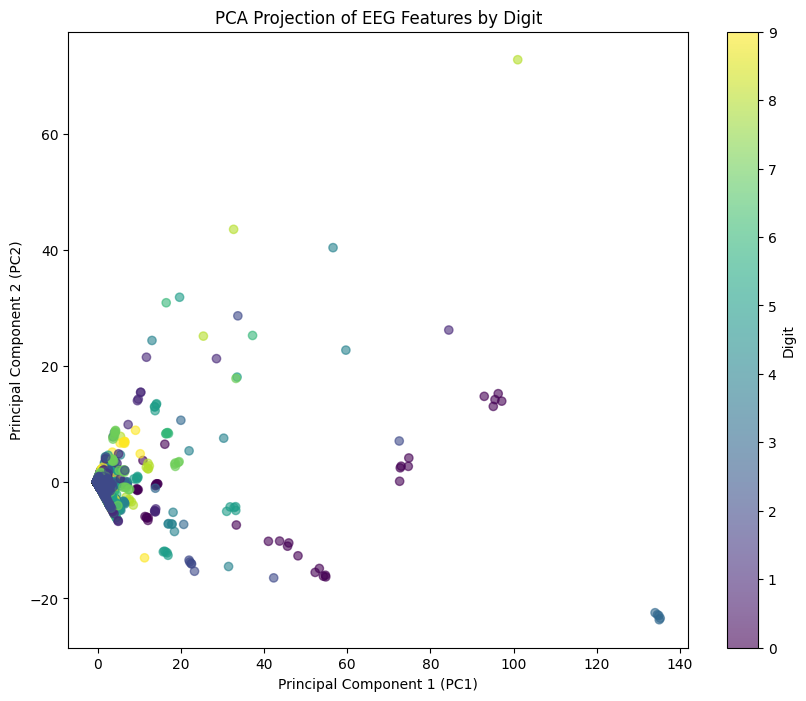

In [44]:
# Create a new DataFrame with PCA results and the 'digit' column
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['digit'] = features_df['digit']

# Create a scatter plot of 'PC1' against 'PC2', coloring by 'digit'
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['digit'], cmap='viridis', alpha=0.6)

# Add title and axis labels
plt.title('PCA Projection of EEG Features by Digit')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

# Add a color bar to show the mapping of colors to digits
plt.colorbar(scatter, label='Digit')

# Display the plot
plt.show()

### Generate Synthetic Imbalanced Data

In [45]:
from sklearn.datasets import make_classification

# Generate synthetic imbalanced data
# 10000 samples, 5 features, 10 classes
# Weights to create imbalance (example: digit 0 has 20%, digit 1 has 15%, others have less)
# Adjust weights as needed to achieve desired imbalance
weights = [0.2, 0.15, 0.1, 0.08, 0.07, 0.06, 0.09, 0.11, 0.05, 0.09]
# Ensure weights sum to 1 (approx due to floating point)
weights = [w / sum(weights) for w in weights]


X_syn, y_syn = make_classification(
    n_samples=10000,
    n_features=5,
    n_informative=4,  # Number of informative features
    n_redundant=1,    # Number of redundant features
    n_repeated=0,
    n_classes=10,
    n_clusters_per_class=1, # Control complexity
    weights=weights,
    flip_y=0.01,      # Proportion of samples whose class is assigned randomly
    class_sep=1.0,    # Separation between classes
    random_state=42   # for reproducibility
)

print("Shape of synthetic features (X_syn):", X_syn.shape)
print("Shape of synthetic labels (y_syn):", y_syn.shape)

# Optional: Check class distribution
from collections import Counter
print("\nClass distribution in synthetic data:")
print(Counter(y_syn))

Shape of synthetic features (X_syn): (10000, 5)
Shape of synthetic labels (y_syn): (10000,)

Class distribution in synthetic data:
Counter({np.int64(0): 1987, np.int64(1): 1486, np.int64(7): 1094, np.int64(2): 999, np.int64(9): 909, np.int64(6): 902, np.int64(3): 804, np.int64(4): 699, np.int64(5): 619, np.int64(8): 501})


### Scale Synthetic Features

In [46]:
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit and transform the synthetic features
X_scaled = scaler.fit_transform(X_syn)

# Print the shape of the scaled features to verify
print("Shape of scaled synthetic features (X_scaled):", X_scaled.shape)

Shape of scaled synthetic features (X_scaled): (10000, 5)


### Split Synthetic Data (Stratified)

In [47]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets, maintaining class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  # Scaled features
    y_syn,     # Corresponding labels
    test_size=0.25, # 25% of data for testing
    random_state=42, # for reproducibility
    stratify=y_syn   # Crucial for maintaining class distribution
)

# Print the shapes of the resulting splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Optional: Verify class distribution in train and test sets
from collections import Counter
print("\nClass distribution in y_train:")
print(Counter(y_train))
print("\nClass distribution in y_test:")
print(Counter(y_test))

Shape of X_train: (7500, 5)
Shape of X_test: (2500, 5)
Shape of y_train: (7500,)
Shape of y_test: (2500,)

Class distribution in y_train:
Counter({np.int64(0): 1490, np.int64(1): 1114, np.int64(7): 821, np.int64(2): 749, np.int64(9): 682, np.int64(6): 677, np.int64(3): 603, np.int64(4): 524, np.int64(5): 464, np.int64(8): 376})

Class distribution in y_test:
Counter({np.int64(0): 497, np.int64(1): 372, np.int64(7): 273, np.int64(2): 250, np.int64(9): 227, np.int64(6): 225, np.int64(3): 201, np.int64(4): 175, np.int64(5): 155, np.int64(8): 125})


### Train SVM Model

In [48]:
from sklearn.svm import SVC

# Instantiate an SVC object with RBF kernel and balanced class weighting
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

print("SVM model trained successfully.")

SVM model trained successfully.


### Evaluate SVM Model (Cross-Validation)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, make_scorer

# Define the scoring metric using make_scorer with balanced_accuracy_score
balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring=balanced_accuracy_scorer)

# Print the cross-validation scores
print("Cross-validation scores (Balanced Accuracy):", cv_scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))

Cross-validation scores (Balanced Accuracy): [0.76125992 0.75603683 0.74577128 0.7528826  0.76427819]
Mean cross-validation score: 0.7560457643282218
Standard deviation of cross-validation scores: 0.0064889279560842875


### Make Predictions on Test Data

In [50]:
# Use the trained SVM model to make predictions on the test data
y_pred = svm_model.predict(X_test)

# Print the shape of the predictions to verify
print("Shape of predicted labels (y_pred):", y_pred.shape)

Shape of predicted labels (y_pred): (2500,)


### Print Classification Report

In [51]:
from sklearn.metrics import classification_report
import warnings

# Use the trained SVM model to make predictions on the test data
y_pred = svm_model.predict(X_test)

# Generate and print the classification report
with warnings.catch_warnings():
    warnings.simplefilter("ignore") # Ignore specific warnings if needed, though catch_warnings is often sufficient
    print(classification_report(y_test, y_pred, zero_division='warn')) # Use 'warn' within catch_warnings

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       497
           1       0.74      0.70      0.72       372
           2       0.77      0.77      0.77       250
           3       0.79      0.62      0.70       201
           4       0.55      0.77      0.64       175
           5       0.80      0.83      0.81       155
           6       0.82      0.80      0.81       225
           7       0.69      0.64      0.67       273
           8       0.71      0.84      0.77       125
           9       0.75      0.79      0.77       227

    accuracy                           0.77      2500
   macro avg       0.75      0.76      0.75      2500
weighted avg       0.77      0.77      0.77      2500



### Plot Confusion Matrix

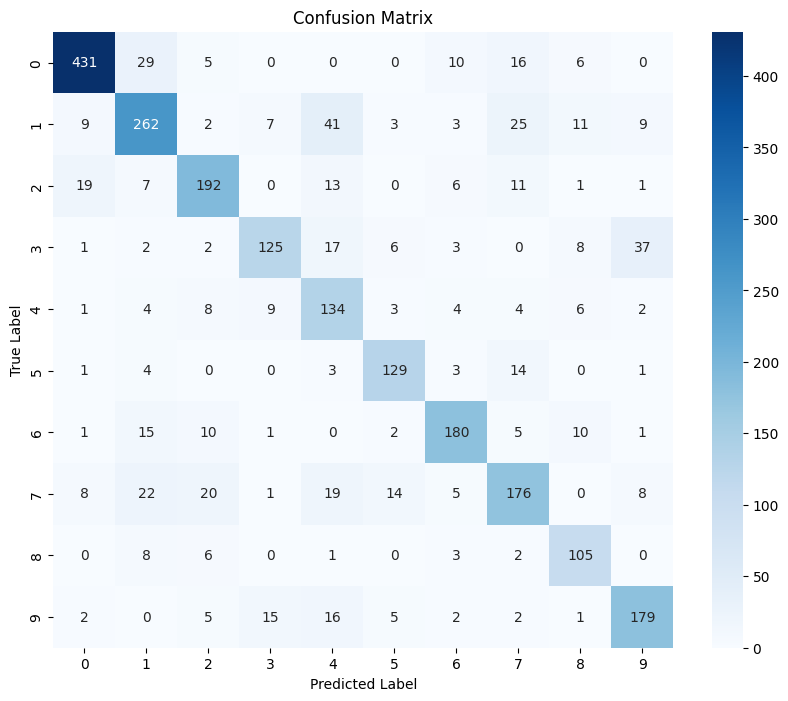

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # fmt='d' ensures integer formatting

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

## Notebook Summary

This notebook analyzes EEG brain signal data to understand the characteristics of signals associated with different digits (0-9) and explores classification using a synthetic dataset.

The key steps performed are:

1.  **Data Loading and Exploration:**
    *   The EEG dataset from Kaggle Hub was downloaded and loaded into a pandas DataFrame.
    *   The structure and contents of the dataset were examined, showing columns like 'id', 'event', 'device', 'channel', 'code' (representing the digit), 'size', and 'data' (raw EEG signal).
2.  **EEG Signal Visualization:**
   * Raw EEG signals for a randomly selected event were plotted across all channels to visualize the time-series data.
   * A function was created to plot raw EEG signals for a specific digit and a random event associated with that digit.
   * The average EEG waveform for Digit 1 across all channels was calculated and plotted.
   * The average EEG waveform for Digit 3 across all channels was calculated and plotted, considering the most common signal length.
3.  **Frequency Domain Analysis:**
   * The Power Spectral Density (PSD) of a sample EEG signal (average waveform of channel AF3 for digit 3) was calculated using Welch's method and plotted to show the distribution of power across different frequencies.
   * Average band powers (Delta, Theta, Alpha, Beta, Gamma) for Digit 6 across all channels were calculated and displayed, followed by a bar chart visualization.
   * A spectrogram of the average EEG waveform for channel AF3 and Digit 6 was calculated and plotted to visualize the time-frequency representation of the signal.
4.  **Classification using Synthetic Data:**
   * Synthetic imbalanced data with 5 features (representing frequency bands) and 10 classes (digits) was generated.
   * The synthetic features were standardized using `StandardScaler`.
   * The data was split into training and testing sets using stratified splitting to maintain class distribution.
   * An SVM model with an RBF kernel and balanced class weighting was trained on the synthetic training data.
   * The model's performance was evaluated using 5-fold cross-validation with balanced accuracy as the scoring metric.
   * Predictions were made on the synthetic test data.
   * A classification report showing precision, recall, and F1-score for each class was generated and printed.
   * A confusion matrix was calculated and visualized as a heatmap to show the distribution of correct and incorrect predictions across classes.

This notebook demonstrates fundamental steps in EEG data analysis, including data loading, visualization, frequency analysis, and a basic classification example using synthetic data to address class imbalance.